<a href="https://colab.research.google.com/github/aarushkachhawa/Heart-Disease-Detection/blob/main/Heart_Disease_Detection_Paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd

In [4]:
data = pd.read_csv("heart.csv") 
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [5]:
def clean_col(data, col_num):
  counter = 0
  data_vals = dict()

  for i in range(data.shape[0]):
    key = data.iloc[i, col_num]

    if(key not in data_vals.keys()):
      data_vals[key] = counter
      counter += 1

    data.iloc[i, col_num] = data_vals[key]
      

In [6]:
for i in range(data.shape[1]):
  col_type = type(data.iloc[0, i])
  if (col_type == str):
    clean_col(data, i)

data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,0,140,289,0,0,172,0,0.0,0,0
1,49,1,1,160,180,0,0,156,0,1.0,1,1
2,37,0,0,130,283,0,1,98,0,0.0,0,0
3,48,1,2,138,214,0,0,108,1,1.5,1,1
4,54,0,1,150,195,0,0,122,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,0,3,110,264,0,0,132,0,1.2,1,1
914,68,0,2,144,193,1,0,141,0,3.4,1,1
915,57,0,2,130,131,0,0,115,1,1.2,1,1
916,57,1,0,130,236,0,2,174,0,0.0,1,1


In [7]:
x = data.iloc[:, 0:11]
y = data.HeartDisease

In [8]:
data.isnull().sum() 

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

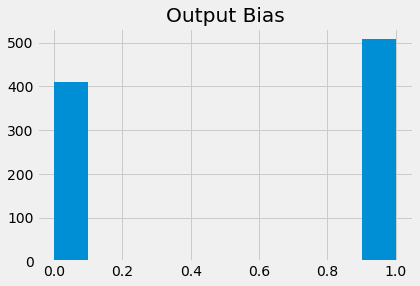

In [9]:
from matplotlib import pyplot as plt

plt.style.use("fivethirtyeight")

plt.hist(y)

plt.title("Output Bias")

plt.show()

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

from keras.utils.np_utils import to_categorical


In [11]:
# Function for examining scores

def train_val(y_train, y_train_pred, y_test, y_pred):
    
    scores = {"train_set": {"Accuracy" : accuracy_score(y_train, y_train_pred),
                            "Precision" : precision_score(y_train, y_train_pred),
                            "Recall" : recall_score(y_train, y_train_pred),                          
                            "f1" : f1_score(y_train, y_train_pred)},
    
              "test_set": {"Accuracy" : accuracy_score(y_test, y_pred),
                           "Precision" : precision_score(y_test, y_pred),
                           "Recall" : recall_score(y_test, y_pred),                          
                           "f1" : f1_score(y_test, y_pred)}}
    
    return pd.DataFrame(scores)

In [12]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import plot_confusion_matrix, r2_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix, accuracy_score

from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression

!pip3 install colorama
import colorama
from colorama import Fore, Style  # maakes strings colored
!pip3 install termcolor
from termcolor import colored

In [13]:
# feature scaling 
scaler = MinMaxScaler()
scaler

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:

# Random forest Classifier with default parameters 

def randomForestClassifier(X_train, X_test, X_train_scaled, X_test_scaled, y_train, y_test):

  RF_model = RandomForestClassifier(class_weight="balanced", random_state=101)
  RF_model.fit(X_train_scaled, y_train)


  y_pred = RF_model.predict(X_test_scaled)
  y_train_pred = RF_model.predict(X_train_scaled)

  rf_f1 = f1_score(y_test, y_pred)
  rf_acc = accuracy_score(y_test, y_pred)
  rf_recall = recall_score(y_test, y_pred)
  rf_auc = roc_auc_score(y_test, y_pred)

  print(confusion_matrix(y_test, y_pred))
  print("\033[1m--------------------------------------------------------\033[0m")
  print(classification_report(y_test, y_pred))
  print("\033[1m--------------------------------------------------------\033[0m")

  plot_confusion_matrix(RF_model, X_test_scaled, y_test)

  train_val(y_train, y_train_pred, y_test, y_pred)

  plot_roc_curve(RF_model, X_test_scaled, y_test);

  plot_precision_recall_curve(RF_model, X_test_scaled, y_test);


[[60 19]
 [ 6 99]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.76      0.83        79
           1       0.84      0.94      0.89       105

    accuracy                           0.86       184
   macro avg       0.87      0.85      0.86       184
weighted avg       0.87      0.86      0.86       184

--------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use o

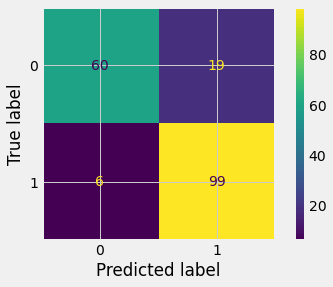

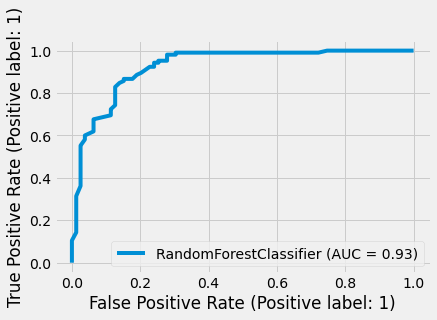

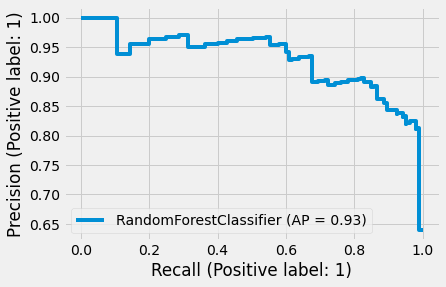

In [15]:
randomForestClassifier(X_train, X_test, X_train_scaled, X_test_scaled, y_train, y_test)

In [16]:
# Gradient Boosting model with best parameters using GridSearchCV
# Computing the accuracy scores on train and validation sets when training with different learning rates

def gradientBoostingClassifier(X_train, X_test, X_train_scaled, X_test_scaled, y_train, y_test):

  GB_model = GradientBoostingClassifier(random_state=42)
  GB_model.fit(X_train_scaled, y_train)

  learning_rates = [0.05, 0.1, 0.15, 0.25, 0.5, 0.6, 0.75, 0.85, 1]

  for learning_rate in learning_rates:
      gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, random_state=42)
      gb.fit(X_train, y_train)
      print("Learning rate: ", learning_rate)
      print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
      print("Accuracy score (test): {0:.3f}".format(gb.score(X_test, y_test)))
      print()

  param_grid = {"n_estimators":[100, 200, 300],
              "subsample":[0.5, 1], "max_features" : [None, 2, 3, 4], "learning_rate": [0.2, 0.5, 0.6, 0.75, 0.85, 1.0, 1.25, 1.5]}  # 'max_depth':[3,4,5,6]

  GB_grid_model = GradientBoostingClassifier(random_state=42)

  GB_grid_model = GridSearchCV(GB_grid_model, param_grid, scoring = "f1", verbose=2, n_jobs = -1).fit(X_train, y_train)

  print(colored('\033[1mBest Parameters of GridSearchCV for Gradient Boosting Model:\033[0m', 'blue'), colored(GB_grid_model.best_params_, 'cyan'))
  print("--------------------------------------------------------------------------------------------------------------------")
  print(colored('\033[1mBest Estimator of GridSearchCV for Gradient Boosting Model:\033[0m', 'blue'), colored(GB_grid_model.best_estimator_, 'cyan'))

  y_pred = GB_grid_model.predict(X_test_scaled)
  y_train_pred = GB_grid_model.predict(X_train_scaled)

  gb_grid_f1 = f1_score(y_test, y_pred)
  gb_grid_acc = accuracy_score(y_test, y_pred)
  gb_grid_recall = recall_score(y_test, y_pred)
  gb_grid_auc = roc_auc_score(y_test, y_pred)

  print(confusion_matrix(y_test, y_pred))
  print("\033[1m--------------------------------------------------------\033[0m")
  print(classification_report(y_test, y_pred))
  print("\033[1m--------------------------------------------------------\033[0m")

  plot_confusion_matrix(GB_grid_model, X_test_scaled, y_test)

  train_val(y_train, y_train_pred, y_test, y_pred)

  plot_roc_curve(GB_model, X_test, y_test);

  plot_precision_recall_curve(GB_model, X_test, y_test);


Learning rate:  0.05
Accuracy score (training): 0.881
Accuracy score (test): 0.842

Learning rate:  0.1
Accuracy score (training): 0.894
Accuracy score (test): 0.842

Learning rate:  0.15
Accuracy score (training): 0.901
Accuracy score (test): 0.859

Learning rate:  0.25
Accuracy score (training): 0.918
Accuracy score (test): 0.859

Learning rate:  0.5
Accuracy score (training): 0.951
Accuracy score (test): 0.842

Learning rate:  0.6
Accuracy score (training): 0.956
Accuracy score (test): 0.870

Learning rate:  0.75
Accuracy score (training): 0.956
Accuracy score (test): 0.859

Learning rate:  0.85
Accuracy score (training): 0.977
Accuracy score (test): 0.837

Learning rate:  1
Accuracy score (training): 0.974
Accuracy score (test): 0.864

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best Parameters of GridSearchCV for Gradient Boosting Model: {'learning_rate': 0.2, 'max_features': 4, 'n_estimators': 200, 'subsample': 1}
-----------------------------------------------

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
 

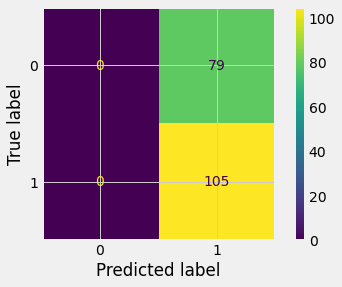

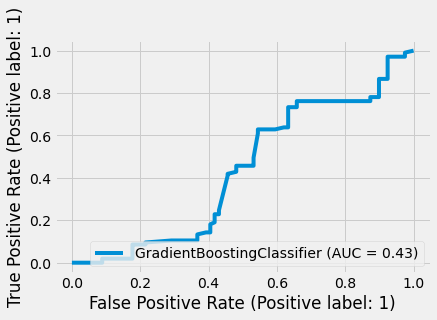

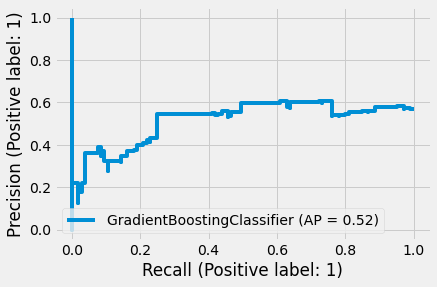

In [17]:
gradientBoostingClassifier(X_train, X_test, X_train_scaled, X_test_scaled, y_train, y_test)

In [18]:
def logisticRegression(X_train, X_test, X_train_scaled, X_test_scaled, y_train, y_test):
  # Logistic Regression with best parameters using GridSearchCV
  LR_model = LogisticRegression() # Since Basic accuracy outcome gives the best model accuracy results, we will implement it 
  LR_model.fit(X_train_scaled, y_train)

  penalty = ["l1", "l2", "elasticnet"]
  l1_ratio = np.linspace(0, 1, 20)
  C = np.logspace(0, 10, 20)

  param_grid = {"penalty" : penalty,
              #"l1_ratio" : l1_ratio,
              "C" : C}
              
  LR_grid_model = LogisticRegression(solver='saga', max_iter=5000, class_weight = "balanced")

  LR_grid_model = GridSearchCV(LR_grid_model, param_grid = param_grid)

  LR_grid_model.fit(X_train_scaled, y_train)

  print(colored('\033[1mBest Parameters of GridSearchCV for LR Model:\033[0m', 'blue'), colored(LR_grid_model.best_params_, 'cyan'))
  print("--------------------------------------------------------------------------------------------------------------------")
  print(colored('\033[1mBest Estimator of GridSearchCV for LR Model:\033[0m', 'blue'), colored(LR_grid_model.best_estimator_, 'cyan'))

  y_pred = LR_grid_model.predict(X_test_scaled)
  y_train_pred = LR_grid_model.predict(X_train_scaled)

  log_grid_f1 = f1_score(y_test, y_pred)
  log_grid_acc = accuracy_score(y_test, y_pred)
  log_grid_recall = recall_score(y_test, y_pred)
  log_grid_auc = roc_auc_score(y_test, y_pred)

  print(confusion_matrix(y_test, y_pred))
  print("\033[1m--------------------------------------------------------\033[0m")
  print(classification_report(y_test, y_pred))
  print("\033[1m--------------------------------------------------------\033[0m")

  plot_confusion_matrix(LR_grid_model, X_test_scaled, y_test)

  train_val(y_train, y_train_pred, y_test, y_pred)

  plot_roc_curve(LR_model, X_test_scaled, y_test, response_method='auto');

  plot_precision_recall_curve(LR_model, X_test_scaled, y_test);


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
100 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1473, in fit
    % self.l1_ratio
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

  warnings.warn(some_fits_failed_message, FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_sea

Best Parameters of GridSearchCV for LR Model: {'C': 1.0, 'penalty': 'l2'}
--------------------------------------------------------------------------------------------------------------------
Best Estimator of GridSearchCV for LR Model: LogisticRegression(class_weight='balanced', max_iter=5000, solver='saga')
[[64 15]
 [13 92]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        79
           1       0.86      0.88      0.87       105

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.84       184
weighted avg       0.85      0.85      0.85       184

--------------------------------------------------------


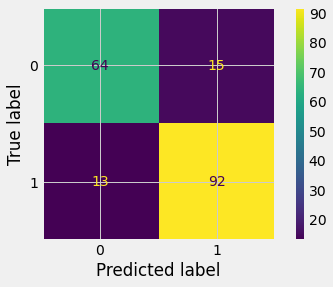

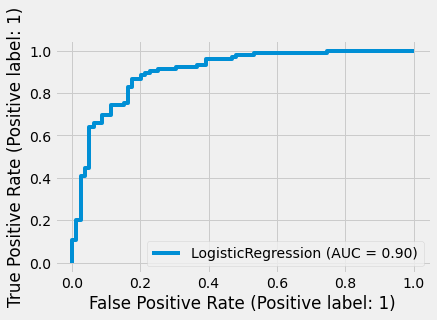

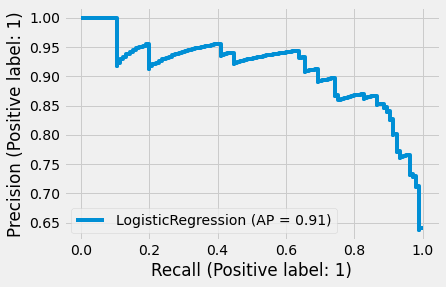

In [19]:
logisticRegression(X_train, X_test, X_train_scaled, X_test_scaled, y_train, y_test)

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers



In [21]:
def make_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=78, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(2, activation='softmax'))
    
    # compile model
    adam = Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

nn_model = make_model()

print(nn_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                1264      
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 2)                 18        
                                                                 
Total params: 1,418
Trainable params: 1,418
Non-trainable params: 0
_________________________________________________________________
None


In [22]:
X_test = np.asarray(X_test).astype(np.float32)
X_train = np.asarray(X_train).astype(np.float32)


Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)

Y_test = np.asarray(Y_test).astype(np.float32)
Y_train = np.asarray(Y_train).astype(np.float32)

In [23]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(2)

X_test = pf.fit_transform(X_test)
X_train = pf.fit_transform(X_train)


In [24]:
training = nn_model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=50, batch_size=10)

Epoch 1/50
74/74 [==============================] - 1s 6ms/step - loss: 52.3646 - accuracy: 0.5395 - val_loss: 0.6596 - val_accuracy: 0.4837
Epoch 2/50
74/74 [==============================] - 0s 3ms/step - loss: 3.2241 - accuracy: 0.4973 - val_loss: 0.6873 - val_accuracy: 0.4457
Epoch 3/50
74/74 [==============================] - 0s 3ms/step - loss: 1.1025 - accuracy: 0.4768 - val_loss: 0.6907 - val_accuracy: 0.5707
Epoch 4/50
74/74 [==============================] - 0s 3ms/step - loss: 1.3061 - accuracy: 0.5490 - val_loss: 1.2496 - val_accuracy: 0.5707
Epoch 5/50
74/74 [==============================] - 0s 2ms/step - loss: 1.3841 - accuracy: 0.5463 - val_loss: 0.6814 - val_accuracy: 0.5707
Epoch 6/50
74/74 [==============================] - 0s 3ms/step - loss: 1.2796 - accuracy: 0.5450 - val_loss: 0.6578 - val_accuracy: 0.5707
Epoch 7/50
74/74 [==============================] - 0s 3ms/step - loss: 0.8024 - accuracy: 0.5531 - val_loss: 0.6889 - val_accuracy: 0.5707
Epoch 8/50
74/74 [=